In [51]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


🟢 Customer Churn Prediction

1️⃣ Problem Definition

Customer Churn refers to customers who stop using a company's product or service.
The goal is to predict which customers are likely to churn based on historical behavior.?


In [52]:
# CSV
#  ↓
# SQL-style ETL (SQLite in Colab)
#  ↓
# EDA (business questions)
#  ↓
# Feature decisions
#  ↓
# ML training


In [53]:
import pandas as pd
import numpy as np

train_file_path = "/content/drive/MyDrive/Customer_churn_prediction/dataset/customer_churn_dataset-training-master.csv"
test_file_path = "/content/drive/MyDrive/Customer_churn_prediction/dataset/customer_churn_dataset-testing-master.csv"



In [54]:
train_df=pd.read_csv(train_file_path)
test_df=pd.read_csv(test_file_path)

In [55]:
print(f"Train Shape : {train_df.shape}")
print(f"Test Shape : {test_df.shape}")

Train Shape : (440833, 12)
Test Shape : (64374, 12)


In [56]:
# Concat Two DataFrames
df = pd.concat([train_df,test_df] , axis = 0)
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [57]:
# Save the concatenated DataFrame to CSV
df.to_csv("customer_churn_com.csv", index=False)

# # Download the file to your local machine
# from google.colab import files
# files.download("customer_churn_com.csv")

In [58]:

df.shape

(505207, 12)

Cleaned dataset from SQL after the data cleaning and data transformation in Microsoft SQL server..

In [59]:
df_cleaned=pd.read_csv("/content/drive/MyDrive/Customer_churn_prediction/dataset/customer_data_clean.csv")
print(df_cleaned.head())


   CustomerID  Age  Gender  Tenure  Usage_Frequency  Support_Calls  \
0           2   30  Female      39               14              5   
1           3   65  Female      49                1             10   
2           4   55  Female      14                4              6   
3           5   58    Male      38               21              7   
4           6   23    Male      32               20              5   

   Payment_Delay Subscription_Type Contract_Length  Total_Spend  \
0             18          Standard          Annual        932.0   
1              8             Basic         Monthly        557.0   
2             18             Basic       Quarterly        185.0   
3              7          Standard         Monthly        396.0   
4              8             Basic         Monthly        617.0   

   Last_Interaction  Churn  
0                17      1  
1                 6      1  
2                 3      1  
3                29      1  
4                20      1  


In [60]:
df_cleaned = df_cleaned.drop(columns=['CustomerID'], errors='ignore')

In [61]:
df_cleaned.isnull().sum()

,0
Age,0
Gender,0
Tenure,0
Usage_Frequency,0
Support_Calls,0
Payment_Delay,0
Subscription_Type,0
Contract_Length,0
Total_Spend,0
Last_Interaction,0


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline

In [63]:
print(df_cleaned.columns)

Index(['Age', 'Gender', 'Tenure', 'Usage_Frequency', 'Support_Calls',
       'Payment_Delay', 'Subscription_Type', 'Contract_Length', 'Total_Spend',
       'Last_Interaction', 'Churn'],
      dtype='object')


In [64]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505206 entries, 0 to 505205
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                505206 non-null  int64  
 1   Gender             505206 non-null  object 
 2   Tenure             505206 non-null  int64  
 3   Usage_Frequency    505206 non-null  int64  
 4   Support_Calls      505206 non-null  int64  
 5   Payment_Delay      505206 non-null  int64  
 6   Subscription_Type  505206 non-null  object 
 7   Contract_Length    505206 non-null  object 
 8   Total_Spend        505206 non-null  float64
 9   Last_Interaction   505206 non-null  int64  
 10  Churn              505206 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 42.4+ MB


In [65]:
df_cleaned.describe()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Churn
count,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000,505206.000000
mean,39.704172,31.350435,15.714825,3.833317,13.496843,620.072766,14.610581,0.555203
std,12.670577,17.237482,8.619323,3.133603,8.451187,245.319256,8.608286,0.496944
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,8.000000,1.000000,6.000000,446.000000,7.000000,0.000000
50%,40.000000,32.000000,16.000000,3.000000,13.000000,648.900024,14.000000,1.000000
75%,49.000000,46.000000,23.000000,6.000000,20.000000,824.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [66]:
df_cleaned.describe(include= 'object')

,Gender,Subscription_Type,Contract_Length
count,505206,505206,505206
unique,2,3,3
top,Male,Standard,Annual
freq,280273,170630,198608


In [67]:
for col in df_cleaned.columns :
    print(col)
    print(df_cleaned[col].unique())
    print("-------------------")

Age
[30 65 55 58 23 51 39 64 29 52 22 48 24 49 19 47 42 57 27 59 21 60 35 18
 56 20 63 25 28 32 38 37 31 53 41 33 26 36 44 34 61 40 45 46 54 43 50 62]
-------------------
Gender
['Female' 'Male']
-------------------
Tenure
[39 49 14 38 32 33 37 12  3 18 21 41 35  4 56 44 15 55 43 52 26  2 29 59
 40 51 53 24 30  6 28 17 60  7 34 10  5 45 54 58 25 13 47 31 22 19 23  1
  8 46 16 50 48 11 42 27  9 20 57 36]
-------------------
Usage_Frequency
[14  1  4 21 20 25 12  8  5  9  6 17 23 13 16 27  2 28 29 15 24  3 22 26
 30  7 11 18 19 10]
-------------------
Support_Calls
[ 5 10  6  7  9  3  4  2  0  1  8]
-------------------
Payment_Delay
[18  8  7 26 16 15  4 11 30 25 13 22  5 14  3 10 28  2  6 27 12 29 17 24
  9 23 21  1  0 20 19]
-------------------
Subscription_Type
['Standard' 'Basic' 'Premium']
-------------------
Contract_Length
['Annual' 'Monthly' 'Quarterly']
-------------------
Total_Spend
[932.         557.         185.         ... 829.59002686 804.29998779
 959.4699707 ]
----------

In [68]:
#categorical columns-binary,ordinal columns
cat_col = df_cleaned.select_dtypes(include='object').columns
#numerical columns
num_col = df_cleaned.select_dtypes(include='number').columns

In [69]:
cat_col

Index(['Gender', 'Subscription_Type', 'Contract_Length'], dtype='object')

Binary-columns: Gender

Ordinal-columns:Subscription_Type', 'Contract_length

In [70]:
num_col

Index(['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction', 'Churn'],
      dtype='object')

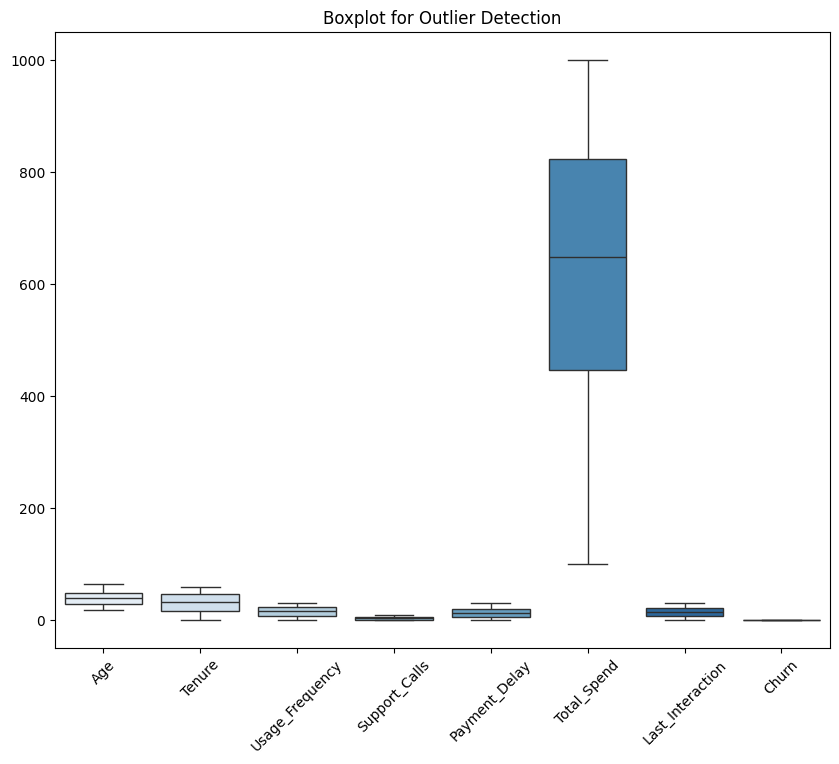

In [71]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_cleaned[num_col] , palette='Blues')

plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation = 45)
plt.show()

Checking the Target feature is imbalanced data or not

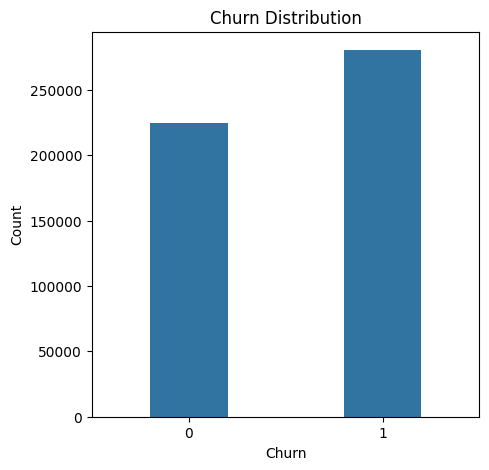

In [72]:
plt.figure(figsize=(5, 5))

sns.countplot(
    data=df_cleaned,
    x="Churn" ,width =.4
)

plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")

plt.show()

Data is imbalanced

/tmp/ipython-input-657158632.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_cleaned, x=col, kde=True, bins=30 ,palette='Blues')
/tmp/ipython-input-657158632.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_cleaned, x=col, kde=True, bins=30 ,palette='Blues')
/tmp/ipython-input-657158632.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_cleaned, x=col, kde=True, bins=30 ,palette='Blues')
/tmp/ipython-input-657158632.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_cleaned, x=col, kde=True, bins=30 ,palette='Blues')
/tmp/ipython-input-657158632.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_cleaned, x=col, kde=True, bins=30 ,palette='Blues')
/tmp/ipython-input-657158632.py:5: UserWarning: Ignoring `palette

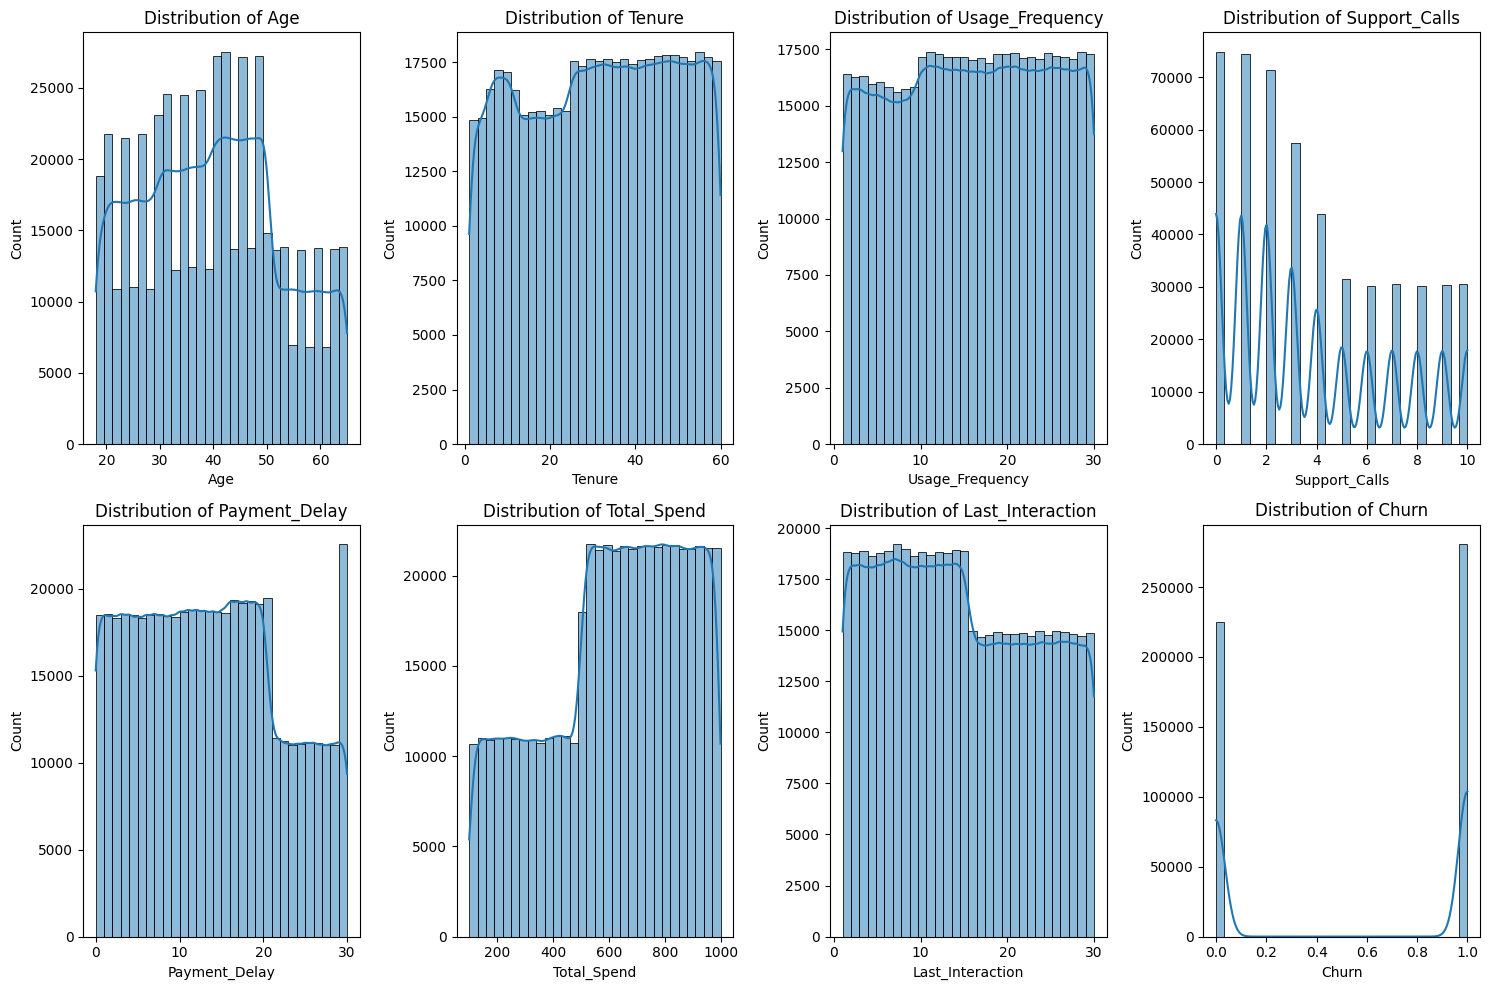

In [73]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_col, 1):
    plt.subplot(2 , 4, i)
    sns.histplot(data=df_cleaned, x=col, kde=True, bins=30 ,palette='Blues')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

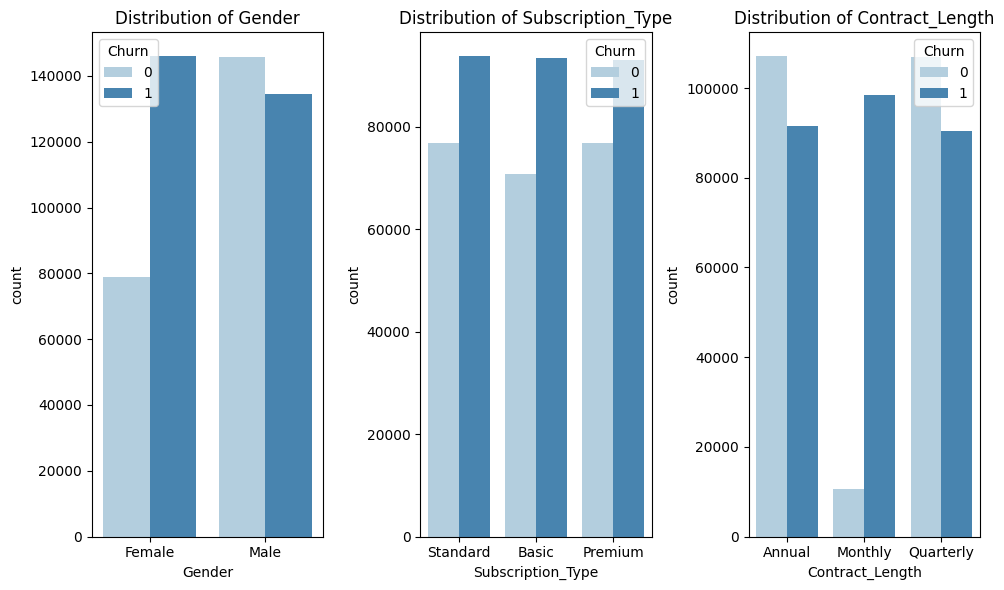

In [74]:
plt.figure(figsize=(10, 6))

for i, col in enumerate(cat_col, 1):
    plt.subplot(1 , 3 , i)
    sns.countplot(data=df_cleaned, x=col , hue = 'Churn' , palette="Blues")
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Females has more churn rate than males

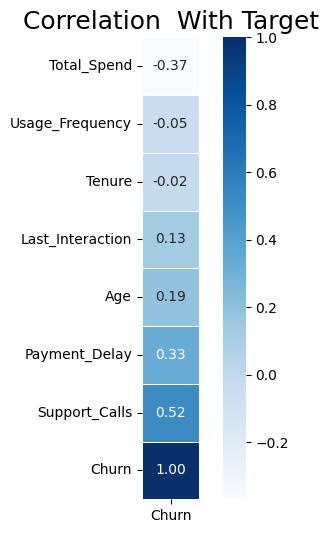

In [75]:
plt.figure(figsize=(6, 6))

corr = df_cleaned[num_col].corr()
corr_with_target = corr['Churn'].sort_values(ascending= True).to_frame()
sns.heatmap(
    data=corr_with_target,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar=True,
    linewidths=0.5,
    linecolor='white',
    square=True
)

plt.title("Correlation  With Target", fontsize=18)
plt.show()

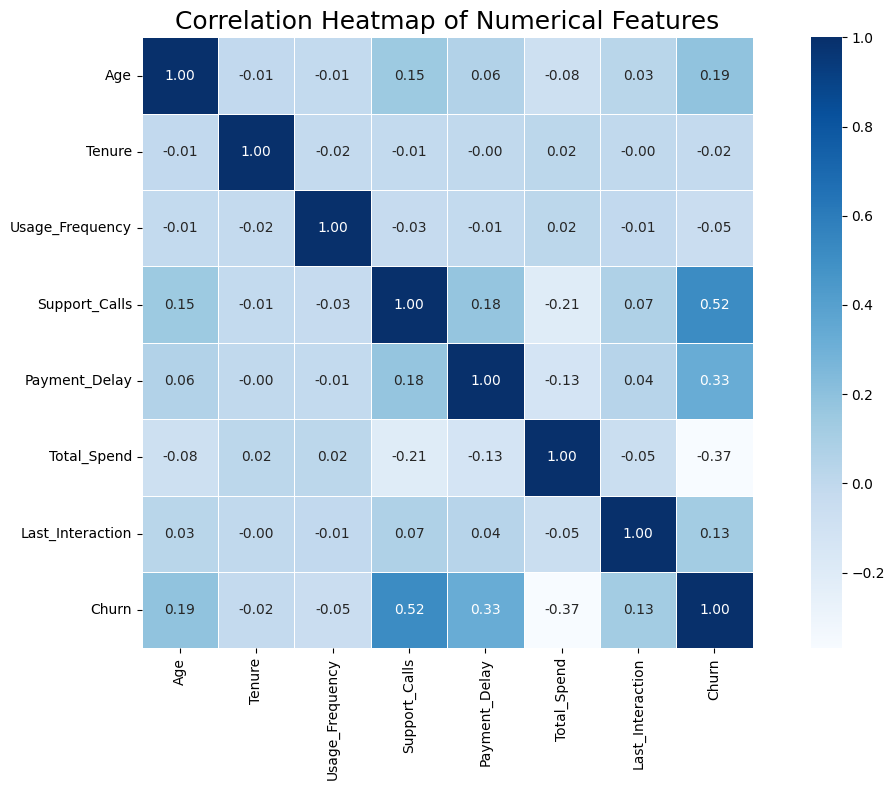

In [76]:
plt.figure(figsize=(12, 8))

corr = df_cleaned[num_col].corr()
sns.heatmap(
    data=corr,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar=True,
    linewidths=0.5,
    linecolor='white',
    square=True
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=18)
plt.tight_layout()
plt.show()


In [78]:
df_encoded = pd.get_dummies(
    df_cleaned,
    columns=['Gender', 'Subscription_Type', 'Contract_Length'],
    drop_first=True
)

df_encoded.head()

,Age,Tenure,Usage_Frequency,Support_Calls,Payment_Delay,Total_Spend,Last_Interaction,Churn,Gender_Male,Subscription_Type_Premium,Subscription_Type_Standard,Contract_Length_Monthly,Contract_Length_Quarterly
0,30,39,14,5,18,932.0,17,1,False,False,True,False,False
1,65,49,1,10,8,557.0,6,1,False,False,False,True,False
2,55,14,4,6,18,185.0,3,1,False,False,False,False,True
3,58,38,21,7,7,396.0,29,1,True,False,True,True,False
4,23,32,20,5,8,617.0,20,1,True,False,False,True,False


In [79]:
#ml libraries
from sklearn.model_selection import train_test_split ,GridSearchCV
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler



from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier ,ExtraTreesClassifier
# from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report , confusion_matrix

In [80]:
X = df_encoded.drop('Churn' , axis= 1)
y = df_encoded['Churn']

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=42, stratify=y_temp
)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(353846, 12)
(353846,)
(75579, 12)
(75579,)
(75781, 12)
(75781,)


In [81]:
scaled_col = ['Age', 'Tenure', 'Usage_Frequency', 'Support_Calls', 'Payment_Delay',
       'Total_Spend', 'Last_Interaction']
scaler = StandardScaler()
X_train[scaled_col] = scaler.fit_transform(X_train[scaled_col])
X_val[scaled_col] = scaler.transform(X_val[scaled_col])
X_test[scaled_col] = scaler.transform(X_test[scaled_col])

In [82]:
rus = RandomUnderSampler(random_state=42)

X_train_res, y_train_res = rus.fit_resample(X_train, y_train)


In [83]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
}


In [84]:
results = []

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    })

    print(f"\n===== {name} =====")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.80      0.87      0.83     33707
           1       0.89      0.82      0.85     42074

    accuracy                           0.84     75781
   macro avg       0.84      0.85      0.84     75781
weighted avg       0.85      0.84      0.84     75781

Confusion Matrix:
[[29286  4421]
 [ 7482 34592]]

===== KNN =====
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     33707
           1       0.90      0.90      0.90     42074

    accuracy                           0.89     75781
   macro avg       0.89      0.89      0.89     75781
weighted avg       0.89      0.89      0.89     75781

Confusion Matrix:
[[29597  4110]
 [ 4169 37905]]

===== Naive Bayes =====
              precision    recall  f1-score   support

           0       0.79      0.89      0.84     33707
           1       0.91      0.81      0.86     42074

    accur

In [85]:
results_df = pd.DataFrame(results).sort_values(by="F1", ascending=False)
results_df.head()


,Model,Accuracy,Precision,Recall,F1
4,Random Forest,0.935195,0.897695,0.996886,0.944694
1,KNN,0.890751,0.902178,0.900913,0.901545
3,Decision Tree,0.873887,0.905035,0.863455,0.883756
5,AdaBoost,0.849698,0.906303,0.813376,0.857329
2,Naive Bayes,0.849039,0.906136,0.812236,0.856620


Hyperparameter tuning

In [86]:
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["lbfgs"],
        "max_iter": [200, 500, 1000]
    },

    # Naive Bayes has no meaningful hyperparameters
    "Naive Bayes": {},

    "KNN": {

        "n_neighbors": [3, 5, 7, 9],
        "weights": ["uniform", "distance"]
    },

    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    },

    "Random Forest": {
        "n_estimators": [50, 100, 150],
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    }
}


In [87]:
tuned_models = {}
tuned_results = []

for name, model in models.items():
    print(f"Running GridSearchCV for {name}...")

    if name in param_grids and param_grids[name]:
        grid = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            scoring="f1",
            cv=5,
            n_jobs=-1
        )
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        model.fit(X_train, y_train)
        best_model = model
        best_params = "No tuning needed"


    tuned_models[name +" Tunning"] = {
        "model": best_model ,
        "best_params": best_params
    }

    y_pred = best_model.predict(X_val)

    tuned_results.append({
        "Model": name +" Tunning",
        "Accuracy": round(accuracy_score(y_val, y_pred),2),
        "Precision": round(precision_score(y_val, y_pred),2),
        "Recall": round(recall_score(y_val, y_pred),2),
        "F1-score": round(f1_score(y_val, y_pred),2),
        "Best_Params": best_params
    })
    print(f"                 {name}       ( Acc : {accuracy_score(y_val, y_pred):.2f})")
    print("=============================================================")
    print(classification_report(y_val, y_pred))



tuned_results_df = pd.DataFrame(tuned_results)
tuned_results_df

Running GridSearchCV for Logistic Regression...
                 Logistic Regression       ( Acc : 0.85)
              precision    recall  f1-score   support

           0       0.82      0.85      0.83     33617
           1       0.87      0.85      0.86     41962

    accuracy                           0.85     75579
   macro avg       0.85      0.85      0.85     75579
weighted avg       0.85      0.85      0.85     75579

Running GridSearchCV for KNN...
                 KNN       ( Acc : 0.90)
              precision    recall  f1-score   support

           0       0.90      0.87      0.89     33617
           1       0.90      0.92      0.91     41962

    accuracy                           0.90     75579
   macro avg       0.90      0.90      0.90     75579
weighted avg       0.90      0.90      0.90     75579

Running GridSearchCV for Naive Bayes...
                 Naive Bayes       ( Acc : 0.86)
              precision    recall  f1-score   support

           0       0.81 

,Model,Accuracy,Precision,Recall,F1-score,Best_Params
0,Logistic Regression Tunning,0.85,0.87,0.85,0.86,"{'C': 10, 'max_iter': 200, 'solver': 'lbfgs'}"
1,KNN Tunning,0.90,0.90,0.92,0.91,"{'n_neighbors': 9, 'weights': 'distance'}"
2,Naive Bayes Tunning,0.86,0.91,0.83,0.87,No tuning needed
3,Decision Tree Tunning,0.93,0.90,0.99,0.94,"{'max_depth': 10, 'min_samples_split': 5}"
4,Random Forest Tunning,0.94,0.90,1.00,0.95,"{'max_depth': None, 'min_samples_split': 10, '..."
5,AdaBoost Tunning,0.86,0.90,0.85,0.87,No tuning needed


In [88]:
!pip install joblib

In [89]:
import joblib

BEST_MODEL = tuned_models['Random Forest Tunning']['model']  # example

joblib.dump(BEST_MODEL, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X_train.columns, 'model_columns.pkl')


['model_columns.pkl']

In [90]:
import pandas as pd
import joblib

def predict_dataframe(raw_df):

    # Load artifacts
    model = joblib.load('best_model.pkl')
    scaler = joblib.load('scaler.pkl')
    model_columns = joblib.load('model_columns.pkl')

    df = raw_df.copy()

    # Drop non-feature columns safely
    drop_cols = ['Customer_ID', 'Churn']
    df = df.drop(columns=drop_cols, errors='ignore')

     # Scale numeric columns
    scaled_col = [
        'Age', 'Tenure', 'Usage_Frequency', 'Support_Calls',
        'Payment_Delay', 'Total_Spend', 'Last_Interaction'
    ]

    df[scaled_col] = scaler.transform(df[scaled_col])

    # One-hot encoding
    df = pd.get_dummies(df)

    # Align with training columns
    df = df.reindex(columns=model_columns, fill_value=0)





    # Predict
    preds = model.predict(df)
    probs = model.predict_proba(df)[:, 1]

    return preds, probs


In [91]:
import joblib
from sklearn.metrics import accuracy_score

best_model = joblib.load('best_model.pkl')

y_test_pred = best_model.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")


Test Accuracy: 0.9358


In [92]:
new_data = pd.read_csv(
    "/content/drive/MyDrive/Customer_churn_prediction/dataset/customer_data_clean.csv"
)

# Keep original for visualization
visual_df = new_data.copy()

preds, probs = predict_dataframe(new_data)

# Add predictions back
visual_df['Predicted_Churn'] = preds
visual_df['Churn_Probability'] = probs


In [ ]:
visual_df.to_csv(
    "/content/drive/MyDrive/Customer_churn_prediction/All_Customers_With_Predictions.csv",
    index=False
)


In [94]:
churn_df = visual_df[visual_df['Predicted_Churn'] == 1].copy()

churn_df.to_csv(
    "/content/drive/MyDrive/Customer_churn_prediction/Predicted_Churners.csv",
    index=False
)


In [ ]:
print("Full dataset rows:", visual_df.shape[0])
print("Predicted churners rows:", churn_df.shape[0])
